[View in Colaboratory](https://colab.research.google.com/github/xujinzh/Awesome/blob/master/tensorflow_py3_colab_sklearn_keras_iris.ipynb)

In [60]:
import tensorflow as tf
a=tf.constant(3)
b=tf.constant(5)
sess=tf.Session()
sess.run(a*b)

15

In [0]:
# !uname -a
# !w
# !pip show tensorflow
# !ls
# !cat /proc/meminfo
# !cat /proc/cpuinfo
# !python --version

In [62]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

Found GPU at: /device:GPU:0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17288319827600449417, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11287966516
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17011834452839926892
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

# matplotlib Chinese 画图&中文

In [0]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import matplotlib


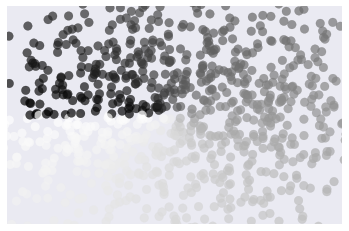

In [64]:
n = 1024
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
T = np.arctan2(Y, X)
plt.scatter(X, Y, s=75, c=T, alpha=0.7)
plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))
plt.xticks(())
plt.yticks(())
plt.show()

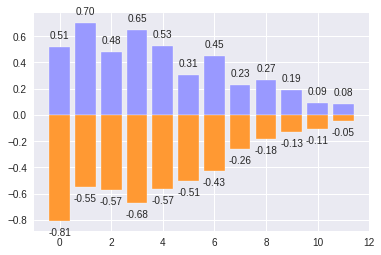

In [65]:
n = 12
X = np.arange(n)
Y1 = (1 - X/float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X/float(n)) * np.random.uniform(0.5, 1.0, n)
fig = plt.figure()
plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9933', edgecolor='white')
for x, y in zip(X, Y1):
  plt.text(x + 0.0, y + 0.05, '%.2f' %y, ha='center', va='bottom')
for x, y in zip(X, Y2):
  plt.text(x + 0.0, -y - 0.05, '-%.2f' %y, ha='center', va='top')
plt.show()

# scipy integrate 积分

In [0]:
import numpy as np
import scipy as sp
from scipy.integrate import quad, dblquad, nquad


In [67]:
y = quad(lambda x: np.exp(-x), 0, np.inf)
print(y)

(1.0000000000000002, 5.842606742906004e-11)


In [68]:
print(dblquad(lambda x, y: np.sin(x + y), -np.pi, np.pi,lambda y: -np.pi, lambda y: np.pi))

(0.0, 4.455640411607382e-14)


In [69]:
def f(x, y):
  return x * y

def bound_x():
  return [0, 0.5]

def bound_y(x):
  return [0, 1 + x]

if __name__ == "__main__":
  print(nquad(f, [bound_y, bound_x]))

(0.11197916666666667, 6.2224265447600445e-15)


# scikit-learn决策树

## 数据挖掘 和 机器学习 三步走

## 1, Pre-processing

In [0]:
import numpy as np
from sklearn.datasets import load_iris # 从库sklearn中的数据集中导入鸢尾花数据集

In [0]:
iris = load_iris() 
# print(iris) # 打印查看鸢尾花数据集的信息

In [72]:
print(len(iris['data'])) # 打印查看数据集的大小

150


In [0]:
from sklearn.cross_validation import train_test_split # 导入模块用来切分数据集为训练数据集和验证数据集
train_data, test_data, train_target, test_target = train_test_split(iris.data, iris.target, test_size=0.2, random_state=1) # 随机切分20%的数据为验证集

In [0]:
# print('train_data:{0}'.format(train_data)) 
# print('test_data:{0}'.format(test_data))
# print('train_target:{0}'.format(train_target))
# print('test_target:{0}'.format(test_target)) # 打印查看切分后的各个数据集

## 2, Modelling

In [0]:
from sklearn import tree # 导入决策树模块

In [0]:
clf = tree.DecisionTreeClassifier(criterion='entropy') # 以信息熵来构造决策树分类器，而不是决策树回归函数
clf.fit(train_data, train_target) # 利用训练数据来训练决策树分类器模型
y_pred = clf.predict(test_data) # 利用训练好的决策树模型来预测验证数据类别

In [77]:
print(len(y_pred))
print("prediction:{0}".format(y_pred))

30
prediction:[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2]


## 3, Verifying

In [0]:
from sklearn import metrics # 导入度量函数

In [79]:
print(metrics.accuracy_score(y_true=test_target, y_pred=y_pred)) # 计算预测的准确率

0.9666666666666667


In [80]:
print(metrics.confusion_matrix(y_true=test_target, y_pred=y_pred))  # 混淆矩阵，其中1表示第二类预测为第三类

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [0]:
# with open("./data/tree.dot", "w") as fw:
#   tree.export_graphviz(clf, out_file=fw) # 将决策树的图保存成文件

# neural network by keras 神经网络训练鸢尾花数据

In [0]:
from keras.models import Sequential # 导入模块，用来存储神经网络，认为此模块是人工神经网络的容器
from keras.layers import Dense, Activation # Dense 为每层设置参数，Activation 为每层设置激活函数
from keras.optimizers import SGD # SGD 为随机梯度下降，用来训练参数

In [0]:
from sklearn.datasets import load_iris # 导入鸢尾花数据
from sklearn.preprocessing import LabelBinarizer # 将标签数据转化为独一编码形式，方便训练数据
from sklearn.cross_validation import train_test_split # 将数据切分为训练集和测试集

In [0]:
iris = load_iris()
train_data, test_data, train_target, test_target = train_test_split(iris.data, iris.target, test_size=0.2, random_state=1) # 切分数据
train_labels = LabelBinarizer().fit_transform(train_target) 
test_labels = LabelBinarizer().fit_transform(test_target) # 将标签转化为独一编码

In [85]:
model = Sequential([
    Dense(5, input_dim=4),
    Activation('relu'),
    Dense(3),
    Activation('sigmoid'),
]) # 为神经网络设置层数，输入输出纬度，激活函数

# model = Sequential()
# model.add(Dense(5, input_dim=4), 
#          Activation('relu'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) # 随机梯度下降算法设置参数 lr（learning rate）是学习率； decay是步长； momentum是动量； nesterov 使动量更优化
model.compile(optimizer=sgd, loss='categorical_crossentropy') # 损失函数设置成交叉熵
model.fit(train_data, train_labels, epochs=200,batch_size=40) # 训练轮数epochs, 每批次训练数据个数batch_size

Epoch 1/200
120/120 [==============================] - 0s 1ms/step - loss: 0.9870
Epoch 2/200
120/120 [==============================] - 0s 131us/step - loss: 0.9840
Epoch 3/200
120/120 [==============================] - 0s 114us/step - loss: 0.9790
Epoch 4/200
120/120 [==============================] - 0s 145us/step - loss: 0.9730
Epoch 5/200
120/120 [==============================] - 0s 128us/step - loss: 0.9658
Epoch 6/200
120/120 [==============================] - 0s 139us/step - loss: 0.9583
Epoch 7/200
120/120 [==============================] - 0s 135us/step - loss: 0.9496
Epoch 8/200
120/120 [==============================] - 0s 129us/step - loss: 0.9407
Epoch 9/200
120/120 [==============================] - 0s 138us/step - loss: 0.9319
Epoch 10/200
120/120 [==============================] - 0s 133us/step - loss: 0.9224
Epoch 11/200
120/120 [==============================] - 0s 135us/step - loss: 0.9124
Epoch 12/200
120/120 [==============================] - 0s 136us/step - loss

120/120 [==============================] - 0s 138us/step - loss: 0.6989
Epoch 32/200
120/120 [==============================] - 0s 127us/step - loss: 0.6905
Epoch 33/200
120/120 [==============================] - 0s 139us/step - loss: 0.6825
Epoch 34/200
120/120 [==============================] - 0s 125us/step - loss: 0.6751
Epoch 35/200
120/120 [==============================] - 0s 106us/step - loss: 0.6680
Epoch 36/200
120/120 [==============================] - 0s 113us/step - loss: 0.6613
Epoch 37/200
120/120 [==============================] - 0s 163us/step - loss: 0.6551
Epoch 38/200
120/120 [==============================] - 0s 173us/step - loss: 0.6492
Epoch 39/200
120/120 [==============================] - 0s 134us/step - loss: 0.6435
Epoch 40/200
120/120 [==============================] - 0s 143us/step - loss: 0.6383
Epoch 41/200
120/120 [==============================] - 0s 117us/step - loss: 0.6332
Epoch 42/200
120/120 [==============================] - 0s 199us/step - loss: 

120/120 [==============================] - 0s 122us/step - loss: 0.5765
Epoch 59/200
120/120 [==============================] - 0s 161us/step - loss: 0.5741
Epoch 60/200
120/120 [==============================] - 0s 125us/step - loss: 0.5719
Epoch 61/200
120/120 [==============================] - 0s 152us/step - loss: 0.5697
Epoch 62/200
120/120 [==============================] - 0s 152us/step - loss: 0.5676
Epoch 63/200
120/120 [==============================] - 0s 162us/step - loss: 0.5656
Epoch 64/200
120/120 [==============================] - 0s 176us/step - loss: 0.5636
Epoch 65/200
120/120 [==============================] - 0s 114us/step - loss: 0.5617
Epoch 66/200
120/120 [==============================] - 0s 135us/step - loss: 0.5599
Epoch 67/200
120/120 [==============================] - 0s 130us/step - loss: 0.5581
Epoch 68/200
120/120 [==============================] - 0s 125us/step - loss: 0.5564
Epoch 69/200
120/120 [==============================] - 0s 137us/step - loss: 

120/120 [==============================] - 0s 213us/step - loss: 0.5317
Epoch 88/200
120/120 [==============================] - 0s 184us/step - loss: 0.5307
Epoch 89/200
120/120 [==============================] - 0s 188us/step - loss: 0.5298
Epoch 90/200
120/120 [==============================] - 0s 178us/step - loss: 0.5288
Epoch 91/200
120/120 [==============================] - 0s 169us/step - loss: 0.5279
Epoch 92/200
120/120 [==============================] - 0s 195us/step - loss: 0.5271
Epoch 93/200
120/120 [==============================] - 0s 161us/step - loss: 0.5262
Epoch 94/200
120/120 [==============================] - 0s 186us/step - loss: 0.5254
Epoch 95/200
120/120 [==============================] - 0s 170us/step - loss: 0.5246
Epoch 96/200
120/120 [==============================] - 0s 169us/step - loss: 0.5238
Epoch 97/200
120/120 [==============================] - 0s 152us/step - loss: 0.5230
Epoch 98/200
120/120 [==============================] - 0s 171us/step - loss: 

120/120 [==============================] - 0s 178us/step - loss: 0.5116
Epoch 116/200
120/120 [==============================] - 0s 153us/step - loss: 0.5111
Epoch 117/200
120/120 [==============================] - 0s 185us/step - loss: 0.5106
Epoch 118/200
120/120 [==============================] - 0s 169us/step - loss: 0.5101
Epoch 119/200
120/120 [==============================] - 0s 162us/step - loss: 0.5097
Epoch 120/200
120/120 [==============================] - 0s 170us/step - loss: 0.5092
Epoch 121/200
120/120 [==============================] - 0s 182us/step - loss: 0.5087
Epoch 122/200
120/120 [==============================] - 0s 181us/step - loss: 0.5083
Epoch 123/200
120/120 [==============================] - 0s 254us/step - loss: 0.5078
Epoch 124/200
120/120 [==============================] - 0s 168us/step - loss: 0.5074
Epoch 125/200
120/120 [==============================] - 0s 191us/step - loss: 0.5070
Epoch 126/200
120/120 [==============================] - 0s 175us/st

120/120 [==============================] - 0s 173us/step - loss: 0.5005
Epoch 144/200
120/120 [==============================] - 0s 189us/step - loss: 0.5002
Epoch 145/200
120/120 [==============================] - 0s 157us/step - loss: 0.4999
Epoch 146/200
120/120 [==============================] - 0s 160us/step - loss: 0.4996
Epoch 147/200
120/120 [==============================] - 0s 179us/step - loss: 0.4993
Epoch 148/200
120/120 [==============================] - 0s 159us/step - loss: 0.4990
Epoch 149/200
120/120 [==============================] - 0s 168us/step - loss: 0.4987
Epoch 150/200
120/120 [==============================] - 0s 166us/step - loss: 0.4984
Epoch 151/200
120/120 [==============================] - 0s 201us/step - loss: 0.4981
Epoch 152/200
120/120 [==============================] - 0s 166us/step - loss: 0.4979
Epoch 153/200
120/120 [==============================] - 0s 178us/step - loss: 0.4976
Epoch 154/200
120/120 [==============================] - 0s 168us/st

120/120 [==============================] - 0s 167us/step - loss: 0.4935
Epoch 172/200
120/120 [==============================] - 0s 189us/step - loss: 0.4933
Epoch 173/200
120/120 [==============================] - 0s 181us/step - loss: 0.4931
Epoch 174/200
120/120 [==============================] - 0s 171us/step - loss: 0.4929
Epoch 175/200
120/120 [==============================] - 0s 186us/step - loss: 0.4927
Epoch 176/200
120/120 [==============================] - 0s 137us/step - loss: 0.4925
Epoch 177/200
120/120 [==============================] - 0s 166us/step - loss: 0.4923
Epoch 178/200
120/120 [==============================] - 0s 208us/step - loss: 0.4921
Epoch 179/200
120/120 [==============================] - 0s 228us/step - loss: 0.4919
Epoch 180/200
120/120 [==============================] - 0s 197us/step - loss: 0.4918
Epoch 181/200
120/120 [==============================] - 0s 167us/step - loss: 0.4916
Epoch 182/200
120/120 [==============================] - 0s 182us/st

Epoch 198/200
120/120 [==============================] - 0s 146us/step - loss: 0.4889
Epoch 199/200
120/120 [==============================] - 0s 158us/step - loss: 0.4887
Epoch 200/200
120/120 [==============================] - 0s 165us/step - loss: 0.4886


In [86]:
print(model.predict_classes(test_data)) # 打印预测的结果标签

[0 2 2 0 2 2 2 0 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 0 2 2 0 0 2 2]


In [0]:
# model.save_weights('./data/w')
# model.load_weights('./data/w') # 用来保持中间训练的参数或权重，因为训练有时候会很耗时间

In [88]:
pwd

'/content'